# Python Independent Project

Project description:
The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time
performance of domestic flights operated by large air carriers. Summary information on the number of
on-time, delayed, canceled, and diverted flights is published in DOT's monthly Air Travel Consumer
Report and in this dataset of 2015 flight delays and cancellations.
You have received three CSV files. After loading the data into Python, answer the following questions:

1. Load the three CSV files (airlines.csv, airports.csv, and flights.csv). Display the shape and column names for each file.

In [37]:
import pandas as pd #import library to read in data

airlines = pd.read_csv('Project Data\\airlines.csv', low_memory = False)
print(f"Airlines shape: {airlines.shape}, \nAirlines Column Names: {airlines.columns}\n")

airports = pd.read_csv('Project Data\\airports.csv', low_memory = False)
print(f"\nAirports shape: {airports.shape}, \nAirports Column Names: {airports.columns}\n")

flights = pd.read_csv('Project Data\\flights.csv', low_memory = False)
print(f"\nFlights shape: {flights.shape}, \nFlights Column Names: {flights.columns}")

Airlines shape: (14, 2), 
Airlines Column Names: Index(['IATA_CODE', 'AIRLINE'], dtype='object')


Airports shape: (322, 7), 
Airports Column Names: Index(['IATA_CODE', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')


Flights shape: (5819079, 31), 
Flights Column Names: Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')


2. Remove all cancelled and diverted flights (5 points).
- Assumptions: use df from previous question

In [38]:
filteredFlights = flights[(flights['DIVERTED'] != 1) & (flights['CANCELLED'] != 1)] #flights where they have NOT been diverted AND have NOT been cancelled
filteredFlights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


3. Replace missing values in all delay reason columns ('AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY') with 0. Show the number of missing values for each of the columns before replacement, and confirm that missing values have been replaced (5 points).

- Assumptions: use df from Q1

In [39]:
fiveDelayReasons = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 
               'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

#before
print(f"Missing Values BEFORE replacement: \n{flights[fiveDelayReasons].isnull().sum()}")

Missing Values BEFORE replacement: 
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64


In [40]:
#do replacement using .fillna()
flights[fiveDelayReasons] = flights[fiveDelayReasons].fillna(0)
#after
print(f"Missing Values AFTER replacement: \n{flights[fiveDelayReasons].isnull().sum()}")

Missing Values AFTER replacement: 
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64


4. Drop rows with missing values in 'ARRIVAL_TIME', 'DEPARTURE_TIME', or 'AIR_TIME'. Show the number of flights before and after dropping the missing values (5 points).
- Assumptions: use df from Q1

In [41]:
print(f"Number of flights BEFORE dropping missing values: {len(flights)}")
dropRows = ['ARRIVAL_TIME', 'DEPARTURE_TIME','AIR_TIME']

#subset df based on rows to drop, then drop na and update df
print(f"Number of flights AFTER dropping missing values: {len(flights.dropna(subset = dropRows))}")

Number of flights BEFORE dropping missing values: 5819079
Number of flights AFTER dropping missing values: 5714008


5. Create a column 'TOTAL_DELAY' by summing all five delay reason columns for each flight (5 points).
- Assumptions: use df from Q1

In [42]:
flights['TOTAL_DELAY'] = flights[fiveDelayReasons].sum(axis=1) #axis = 1, means sum row-wise over the fiveDelayReasons columns

6. Create a new column 'SCHEDULED_HOUR' from 'SCHEDULED_DEPARTURE' (e.g., 1330 → 13) (5 points).
- Assumptions: using "flights" df from Q5

In [44]:
#created new col SCHEDULED_HOUR from SCHEDULED_DEPARTURE
flights['SCHEDULED_HOUR'] = flights['SCHEDULED_DEPARTURE'] // 100

7. In the flights dataset, how many unique airlines are there? List their airline code and airline names (7.5 points).
- Assumptions: using "flights" df from Q6
- Merge "flights" and "airlines" df to access Airline Name and Code.

In [45]:
import numpy as np
import pandas as pd
uniqueAirlines = pd.DataFrame({"IATA_CODE": flights['AIRLINE'].unique()})
print(f"There are {uniqueAirlines.shape[0]} many unique airlines.\n")
flights_uniqueAirlines = pd.merge(uniqueAirlines, airlines, how = 'left', on='IATA_CODE')
flights_uniqueAirlines.rename(columns={'IATA_CODE':'Airline Code', 'AIRLINE' : 'Airline Name'})

flights_uniqueAirlines

There are 14 many unique airlines.



,IATA_CODE,AIRLINE
0,AS,Alaska Airlines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,DL,Delta Air Lines Inc.
4,NK,Spirit Air Lines
5,UA,United Air Lines Inc.
6,HA,Hawaiian Airlines Inc.
7,B6,JetBlue Airways
8,OO,Skywest Airlines Inc.
9,EV,Atlantic Southeast Airlines


8. What are the top 5 most common destination airports by number of flights? List the IATA_CODE, Airport Name, and flight count (7.5 points).
- Assumptions: using "flights_airlines" df from Q7 to be able to access flights and airlines information

In [46]:
#value_counts() returns a series in order of the frequency of each distinct row in the Dataframe, head grabs the top 5
flights_airlines = pd.merge(flights, airlines, how = 'left', left_on='AIRLINE', right_on='IATA_CODE')
top5Destination = flights_airlines['DESTINATION_AIRPORT'].value_counts().head(5).reset_index() #reset index to make the series into a dataframe
top5Destination.columns = ["IATA_CODE", "FLIGHT_COUNT"]

# Add Flight count horizontally to airports df based on 
top5Destination = top5Destination.merge(airports, on='IATA_CODE') 

print(f"Top 5 destination airports by number of flights:\n{top5Destination[['FLIGHT_COUNT', 'IATA_CODE', 'AIRPORT']]}\n")

Top 5 destination airports by number of flights:
   FLIGHT_COUNT IATA_CODE                                           AIRPORT
0        346904       ATL  Hartsfield-Jackson Atlanta International Airport
1        285906       ORD              Chicago O'Hare International Airport
2        239582       DFW           Dallas/Fort Worth International Airport
3        196010       DEN                      Denver International Airport
4        194696       LAX                 Los Angeles International Airport



9. Which destination city has the highest average total delay? (7.5 points).
- Assumptions: using "flights" df from Q6
- Assumptions: merge flights with airports to capture the destination city information

In [47]:
flights_airports = flights.merge(airports, how = 'left', left_on='DESTINATION_AIRPORT', right_on='IATA_CODE')
avgDelayCity = flights_airports.groupby('CITY')['TOTAL_DELAY'].mean().sort_values(ascending=False).reset_index()
print(f"City: {avgDelayCity['CITY'].iloc[0]}, Average Total Delay: {avgDelayCity['TOTAL_DELAY'].iloc[0]:.4f}.")

City: St Cloud, Average Total Delay: 22.8537.


10. What is the average arrival delay for each airline? (7.5 points).
- Assumptions: using "flights" df from Q6

In [48]:
avgArrivalDelay = flights.groupby('AIRLINE')['ARRIVAL_DELAY'].mean().reset_index().rename(columns={"AIRLINE" : "IATA_CODE"})
avgArrivalDelay = avgArrivalDelay.merge(airlines, on = "IATA_CODE")
print(f"Average Arrival Delay for each airline: \n{avgArrivalDelay}")

Average Arrival Delay for each airline: 
   IATA_CODE  ARRIVAL_DELAY                       AIRLINE
0         AA       3.451372        American Airlines Inc.
1         AS      -0.976563          Alaska Airlines Inc.
2         B6       6.677861               JetBlue Airways
3         DL       0.186754          Delta Air Lines Inc.
4         EV       6.585379   Atlantic Southeast Airlines
5         F9      12.504706        Frontier Airlines Inc.
6         HA       2.023093        Hawaiian Airlines Inc.
7         MQ       6.457873  American Eagle Airlines Inc.
8         NK      14.471800              Spirit Air Lines
9         OO       5.845652         Skywest Airlines Inc.
10        UA       5.431594         United Air Lines Inc.
11        US       3.706209               US Airways Inc.
12        VX       4.737706                Virgin America
13        WN       4.374964        Southwest Airlines Co.


11. How many flights were cancelled per airline? (7.5 points).

- Assumptions: Since question 2 asked to remove the cancelled flights, I will be using the flights data from Q6 (which has the cancelled flights).

In [49]:
cancelledFlights = flights[flights['CANCELLED'] == 1].groupby('AIRLINE').size()
cancelledFlights

AIRLINE
AA    10919
AS      669
B6     4276
DL     3824
EV    15231
F9      588
HA      171
MQ    15025
NK     2004
OO     9960
UA     6573
US     4067
VX      534
WN    16043
dtype: int64

12. Which hour of the day had the most scheduled departures? (7.5 points).

- Assumptions: using "flights" df from Q6

In [50]:
hourOfDayDepartures = flights.groupby('SCHEDULED_HOUR').size().sort_values(ascending=False).reset_index()
print(f"Hour of day with the most scheduled departures: {hourOfDayDepartures['SCHEDULED_HOUR'].iloc[0]} AM.") #return as series

Hour of day with the most scheduled departures: 6 AM.


13. Which city had the most flights arriving overall? (5 points).
- Assumptions: df from Q9 ("flights_airports") since we need "flights" df and city information from the "airports" df (thus, need the merged df)

In [52]:
print(f"{flights_airports['CITY'].value_counts().reset_index().iloc[0,0]} had the most flights overall.")

Chicago had the most flights overall.


14. What percentage of flights were delayed ('ARRIVAL_DELAY' > 15)? (5 points).

- Assumptions: using "flights" df from Q6

In [53]:
print(f"Percentage of flights delayed: {(len(flights[flights['ARRIVAL_DELAY'] > 15]) / len(flights))*100:.2f}%")

Percentage of flights delayed: 17.59%


15. Create a histogram of flight distances (10 points).

- Assumptions: using "flights" df from Q6

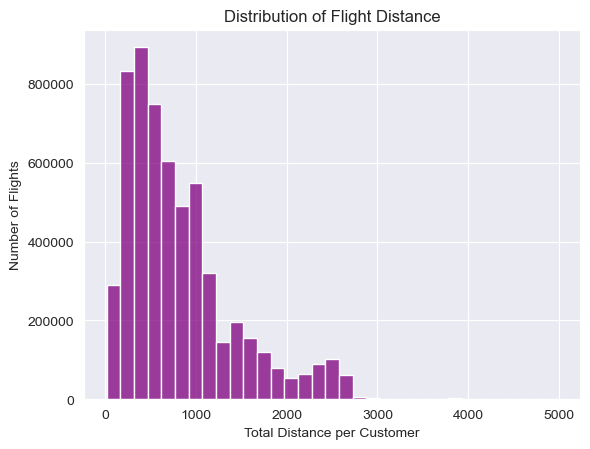

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
sns.set_palette('pastel')
sns.histplot(data = flights, x='DISTANCE', color='purple', binwidth=150)

plt.xlabel('Total Distance per Customer')
plt.ylabel('Number of Flights')
plt.title('Distribution of Flight Distance')
plt.show()

16. Create a bar chart showing the top 5 airlines with the highest average arrival delay (10 points).
- Assumptions: Use Q10 "avgArrivalDelay" df, since we already grouped flights dataset by airline, and subset by highest avg arrival delay time after sorting

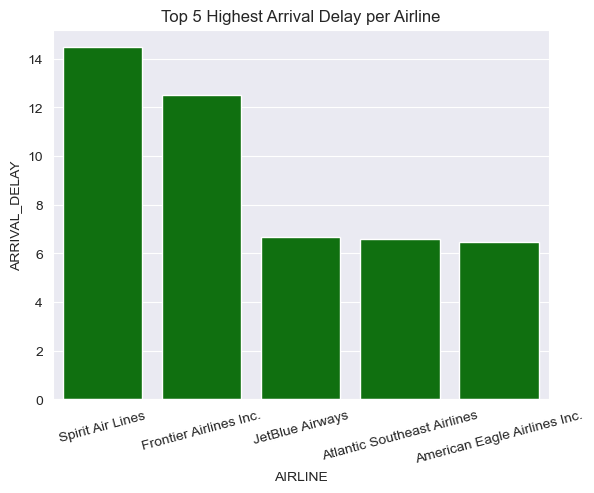

In [55]:
top5AvgArrivalDelay = avgArrivalDelay.sort_values(by = 'ARRIVAL_DELAY', ascending=False).iloc[:5]
top5AvgArrivalDelay
sns.barplot(x='AIRLINE', y='ARRIVAL_DELAY', data = top5AvgArrivalDelay, color = 'green', errorbar=None)

plt.title('Top 5 Highest Arrival Delay per Airline')
plt.xlabel('AIRLINE')
plt.xticks(top5AvgArrivalDelay['AIRLINE'], rotation=15);